## How to make a network that matches the output.

+ radar images are `1660, 1340`
+ sat images are `3712, 3712`

approach could be divide everything by 10

+ radar images are `166, 134`
+ sat images are `371` by `371`

Question:
+ how to resample this ?
+ how to go from dimension `(371, 371)` to `(166,134)`

In [12]:
%pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [30]:
import torch
import matplotlib.pyplot as plt
import numpy as np

In [31]:
radar = np.load("../data/preprocessed/radar/radar_nl_202304211800.npy")
satellite = np.load(
        "../data/preprocessed/satellite/MSG3-SEVI-MSG15-0100-NA-20230421181241.751000000Z-NA.npy"
)

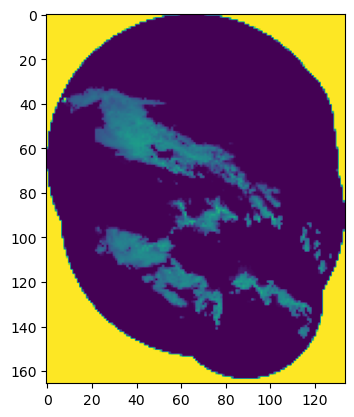

In [32]:
plt.imshow(radar)

In [33]:
import cv2

In [34]:
resizeRadar = cv2.resize(radar, (166, 134))

In [35]:
resizeRadar

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

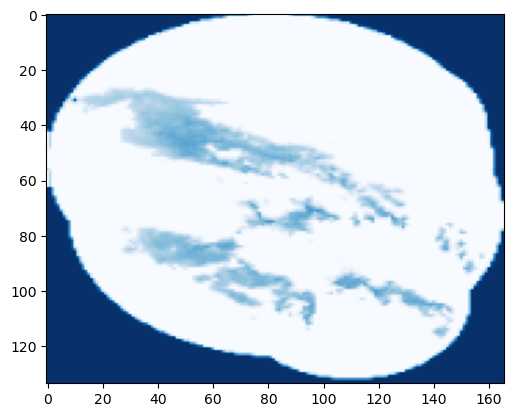

In [36]:
plt.imshow(resizeRadar, cmap="Blues")

In [37]:
satellite.shape

(4, 166, 134)

In [38]:
radar.shape

(166, 134)

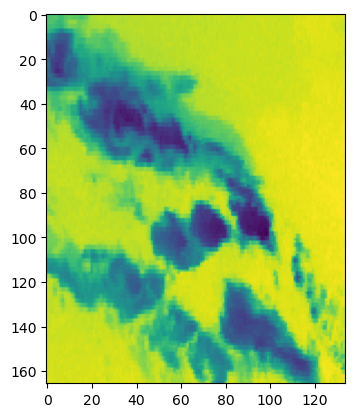

In [29]:
plt.imshow(satellite[3])

In [51]:
myimage = torch.randn((1, 371, 371))

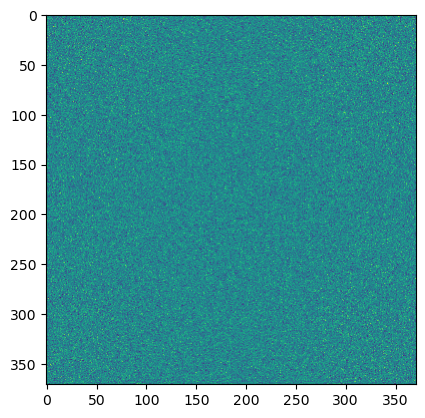

In [53]:
plt.imshow(myimage.reshape(371, 371))

In [199]:
convLayer = torch.nn.Conv2d(in_channels=1, out_channels=1, kernel_size=(41, 108), stride=2)

In [200]:
# max_pooling = torch.nn.MaxPool2d((2,3))

In [201]:
# res = max_pooling(myimage)

In [202]:
result = convLayer(myimage)

In [203]:
result.size()

torch.Size([1, 166, 132])

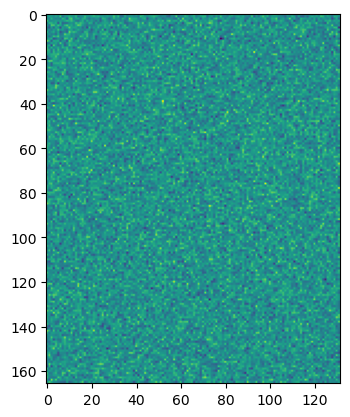

In [204]:
plt.imshow(np.reshape(result.detach().numpy(), (166,132)))

In [38]:
res.size()

torch.Size([1, 5, 3])

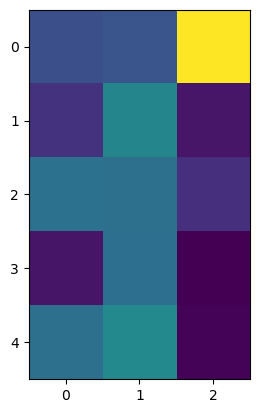

In [43]:
plt.imshow(np.reshape(res.detach().numpy(), (5,3)))

In [1]:
import torch

In [4]:
my_input = torch.randn((1, 12, 1, 166, 134))
h_prev = torch.randn(((1, 64, 166, 134)))

In [10]:
my_input[:, -1, :, :, :].size()

torch.Size([1, 1, 166, 134])

In [11]:
h_prev.size()

torch.Size([1, 64, 166, 134])

In [7]:
combined = torch.cat((my_input[:, -1, :, :, :], h_prev), dim=1)